<a href="https://colab.research.google.com/github/Rsoni94/Bike-Sharing-Prediction/blob/main/ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Currently Rental Bikes are introduced in many urban cities for the mobility comfort.
The Objective is to make the bike available and accesible to all public in right time and less waiting time.
The important concern is to consider here is stable supply of bike in the respective cities.
We have to predict the bike count at each hour with stable supply

# **GitHub Link -**

GitHub Link - https://github.com/Rsoni94/Bike-Sharing-Prediction.git

# **Problem Statement**


## Currently Rental Bikes are introduced in many urban cities for the mobility comfort.
## The Objective is to make the bike available and accesible to all public in right time and less waiting time.
## The important concern is to consider here is stable supply of bike in the respective cities.
## We have to predict the bike count at each hour with stable supply 

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
#to display all the graph in the workbook 
sns.set_style("whitegrid",{'grid.linestyle': '--'})
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path ='/content/drive/MyDrive/Bike Sharing Cound Pred/SeoulBikeData.csv'
df1 = pd.read_csv(file_path, index_col=None, header=0, encoding='latin-1')
df1

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

### Dataset First View

In [4]:
# Dataset First Look
df1.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df1.shape

(8760, 14)

### Dataset Information

In [6]:
# Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df1.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df1.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

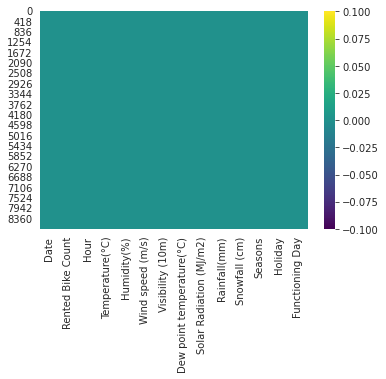

In [9]:
# Visualizing the missing values
df = pd.DataFrame(df1)

# create heatmap of missing values
sns.heatmap(df1.isnull(), cmap='viridis')

# show plot
plt.show()

### What did you know about your dataset?

- I have go through the data set and i found below insights,
There are 8760  rows & 14 columns given.
- I found that there were some object datatype and some are Integer and Float datatype so would have to change the object datatype.
- There are 0 null values and duplicated values are not there in the dataset.


## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df1.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Dataset Describe
df1.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description 

- The mean value of "Rented Bike Count" is 704.60 and the median (50th percentile) is 504.50, which indicates that the distribution is positively skewed with some extreme values on the higher side.

- The "Hour" column shows that the dataset consists of hourly observations.

- The mean temperature is 12.88°C, the temperature range is between -17.8°C to 39.4°C. The standard deviation is 11.94, which indicates a relatively high variation in the temperature.

- The humidity ranges from 0% to 98%, with an average of 58.23%. The standard deviation of 20.36 indicates a relatively high variation in the humidity level.

- The mean wind speed is 1.72 m/s with a standard deviation of 1.04, which indicates a moderate variation in wind speed.

- The mean visibility is 1436.83 meters with a standard deviation of 608.3, which indicates a high variation in visibility.

- The mean dew point temperature is 4.07°C with a standard deviation of 13.06, which indicates a relatively high variation in the dew point temperature.

- The mean solar radiation is 0.57 MJ/m2 with a standard deviation of 0.87.

- The average rainfall is 0.14 mm with a standard deviation of 1.13 and the maximum rainfall is 35.00 mm.

- The average snowfall is 0.07 cm with a standard deviation of 0.44 and the maximum snowfall is 8.80 cm.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
unique_counts = df1.nunique()
unique_counts

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [13]:
for col in df1.columns:
    print(col, df1[col].unique())

Date ['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018' '13/02/2018'
 '14/

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
df1["Day"] = pd.to_datetime(df1.Date, format="%d/%m/%Y").dt.day
df1["Month"] = pd.to_datetime(df1.Date, format="%d/%m/%Y").dt.month
df1["Year"] = pd.to_datetime(df1.Date, format="%d/%m/%Y").dt.year

In [15]:
df1.drop(["Date"], axis = 1, inplace = True)
df1

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Day  \
0              0.0            0.0  Winter  No Holiday             Yes    1   
1              0.0            0.0  Winter  No Holiday             Yes    1   
2              0.0            0.0  Winter  No Holiday             Yes    1   
3              0.0            0.0  Winter  No Holiday             Yes    1   
4              0.0            0.0  Winter  No Holiday             Yes    1   
...            ...            ...     ...         ...             ...  ...   
8755           0.0            0.0  Autumn  No Holiday             Yes   30   
8756           0.0            0.0  Autumn  No Holiday             Yes   30   
8757           0.0            0.0  Autumn  No Holiday             Yes   30   
8758           0.0            0.0  Autumn  No Holiday             Yes   30   
8759           0.0            0.0  Autumn  No Holiday             Yes   30   

      Month  Year  
0        12  2017  
1        12  2017  
2        12  2017  
3        12  2017  
4        12  2017  
...     ...   ...  
8755     11  2018  
8756     11  2018  
8757     11  2018  
8758     11  2018  
8759     11  2018  

[8760 rows x 16 columns]

In [16]:
df1['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [17]:
df1['Hour'] = df1['Hour'].replace(list(range(0,13)), 'Morning')
df1['Hour'] = df1['Hour'].replace(list(range(12,19)), 'Afternoon')
df1['Hour'] = df1['Hour'].replace(list(range(18,24)), 'Night')

In [18]:
df1['Year'] = df1['Year'].astype(object)

In [19]:
df1['Year']=df1['Year'].replace( 2017, 0)
df1['Year']=df1['Year'].replace( 2018, 1)

In [20]:
df1['Month'] = df1['Month'].astype(object)

In [21]:
df1['Month']=df1['Month'].replace(1, 'January')
df1['Month']=df1['Month'].replace(2, 'February')
df1['Month']=df1['Month'].replace(3, 'March')
df1['Month']=df1['Month'].replace(4, 'April')
df1['Month']=df1['Month'].replace(5, 'May')
df1['Month']=df1['Month'].replace(6, 'Jun')
df1['Month']=df1['Month'].replace(7, 'July')
df1['Month']=df1['Month'].replace(8, 'August')
df1['Month']=df1['Month'].replace(9, 'September')
df1['Month']=df1['Month'].replace(10, 'October')
df1['Month']=df1['Month'].replace(11, 'November')
df1['Month']=df1['Month'].replace(12, 'December')

In [22]:
# get all the categorical columns name
cat_cols = list(df1.select_dtypes(include='object').columns)
print(f'Categorical columns: {cat_cols}')

Categorical columns: ['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Month']


In [23]:
# get all the continuous columns name
num_col = list(df1.select_dtypes(exclude='object').columns)
print(f'Numerical Columns: {num_col}')

Numerical Columns: ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day', 'Year']


In [24]:
categorical_columns=df1[cat_cols].copy()
categorical_columns

Hour Seasons     Holiday Functioning Day     Month
0     Morning  Winter  No Holiday             Yes  December
1     Morning  Winter  No Holiday             Yes  December
2     Morning  Winter  No Holiday             Yes  December
3     Morning  Winter  No Holiday             Yes  December
4     Morning  Winter  No Holiday             Yes  December
...       ...     ...         ...             ...       ...
8755    Night  Autumn  No Holiday             Yes  November
8756    Night  Autumn  No Holiday             Yes  November
8757    Night  Autumn  No Holiday             Yes  November
8758    Night  Autumn  No Holiday             Yes  November
8759    Night  Autumn  No Holiday             Yes  November

[8760 rows x 5 columns]

### What all manipulations have you done and insights you found?

- Date column is given "Object" type so we could not do data exploration from that so i decided to seperate the data in to "Day", "Month", "Year" Column & drop original column(i.e. Date).

- Take Hour Column as Hour column is given integer values ranges from 0 to 23 so i thought that whether i convert this hour values into binning (i.e 'Morning', 'Afternoon' and 'Night') so that we could get ample of information like which hour has maximum rental bike, which bike has lower rental bike in perticular hour and so on....

- Then after i have targeted 'Year' Column and i did Lable Encoding as {0: 2017 & 1: 2018} so that my column become numerical variable now i can do analysis on that and get more insights like which year has maximum rental bike, which has lower, in which year of month has maximum rental bike and so on...

- Moreover now i have taken 'Month' Column and i was integer type so what i have done first i did lable encoding for each integer value like({1:January, 2: February & so on) so that visualization would be much clearer.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Hours Vs Rented Bike count')

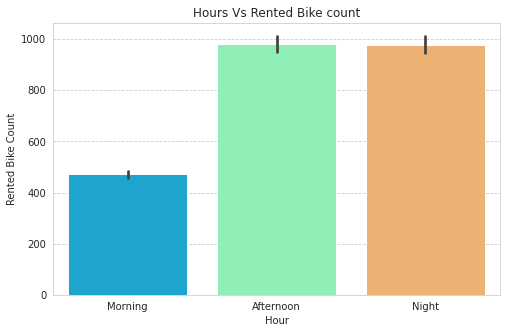

In [25]:
# Chart - 1 visualization code
plt.figure(figsize=(8,5))
sns.barplot(x='Hour',y='Rented Bike Count',data=df1, palette='rainbow')
plt.title("Hours Vs Rented Bike count")

##### 1. Why did you pick the specific chart?

- Bar charts are used to represent and compare categorical data or discrete data and use for univariate analysis as shown here My onjective for this chart was to compare rented bike count with diffrent categories of hour(i.e Morning, Afternoon, Night).

##### 2. What is/are the insight(s) found from the chart?

- We can infer that, in Afternoon and Night there were more vehicle rented so for our business perspective we could focus more on morning time for increase supply of rented bike.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- This information would create positive business impact as we could se that in morning rental count is low so we could more focus on morning time to increase the supply and we will moderately focus on other hour time line as count is high but still there were scope of improvement to further expand the business

#### Chart - 2

Text(0.5, 1.0, 'Hours Vs Rented Bike count Vs Seasons')

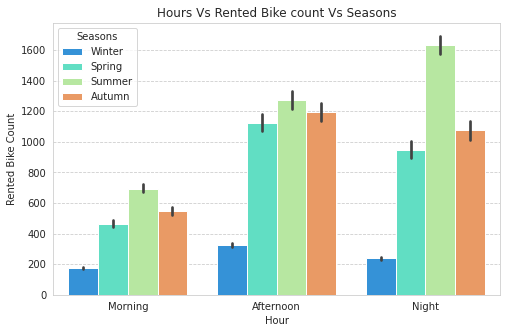

In [26]:
# Chart - 2 visualization code
plt.figure(figsize=(8,5))
sns.barplot(x='Hour',y='Rented Bike Count',data=df1, palette='rainbow', hue='Seasons')
plt.title("Hours Vs Rented Bike count Vs Seasons")

##### 1. Why did you pick the specific chart?

- Bar charts are used to represent and compare categorical data or discrete data and use to check bivariate analysis as shown above.
- My objective is that, i would like to know that in which season & in which time frame bike rent count would be high.

##### 2. What is/are the insight(s) found from the chart?

- we have analysed previously that which time frame has maximum bike rented but not get clear idea there, so for further analysis here i have used bivariate analysis with 3 features and found below observations,
   1. In Morning bike rent count is more in Summer Season
   2. In Afternoon bike rent count is more in Summer Season
   3. In Night bike rent count is more in Summer Season

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- This information would create positive business impact as we could se that in all seasons we could find Morning time has very lower rental count and it is a very serious concern about business so we could have to focus more towards that,

#### Chart - 3

Text(0.5, 1.0, 'Whether Temp affect the bike rent count??')

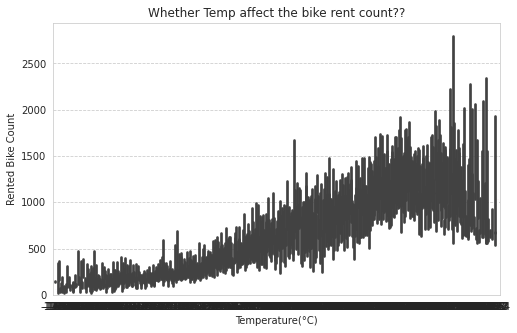

In [27]:
# Chart - 3 visualization code
plt.figure(figsize=(8,5))
sns.barplot(x='Temperature(°C)',y='Rented Bike Count',data=df1, palette='rainbow')
plt.title("Whether Temp affect the bike rent count??")

##### 1. Why did you pick the specific chart?

- Bar charts are used to represent and compare categorical data or discrete data and use to check univariate analysis as shown above.
- My objective was to analyse that, what would be the effect of temperature on bike renting count.

##### 2. What is/are the insight(s) found from the chart?

- After plot above plot we come to know that as the temperature increasing bike rent count is increasing, so for business perspective we could have focus more where temperature is low by giving some additional services to motivate people to use this service.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Here we would get positive growth towards our business as temperature is going high our count is going high but,

Concen is there in the area where temperature is low and there rental count seems to be less.

#### Chart - 4

Text(0.5, 1.0, 'Whether Humidity affect the bike rent count??')

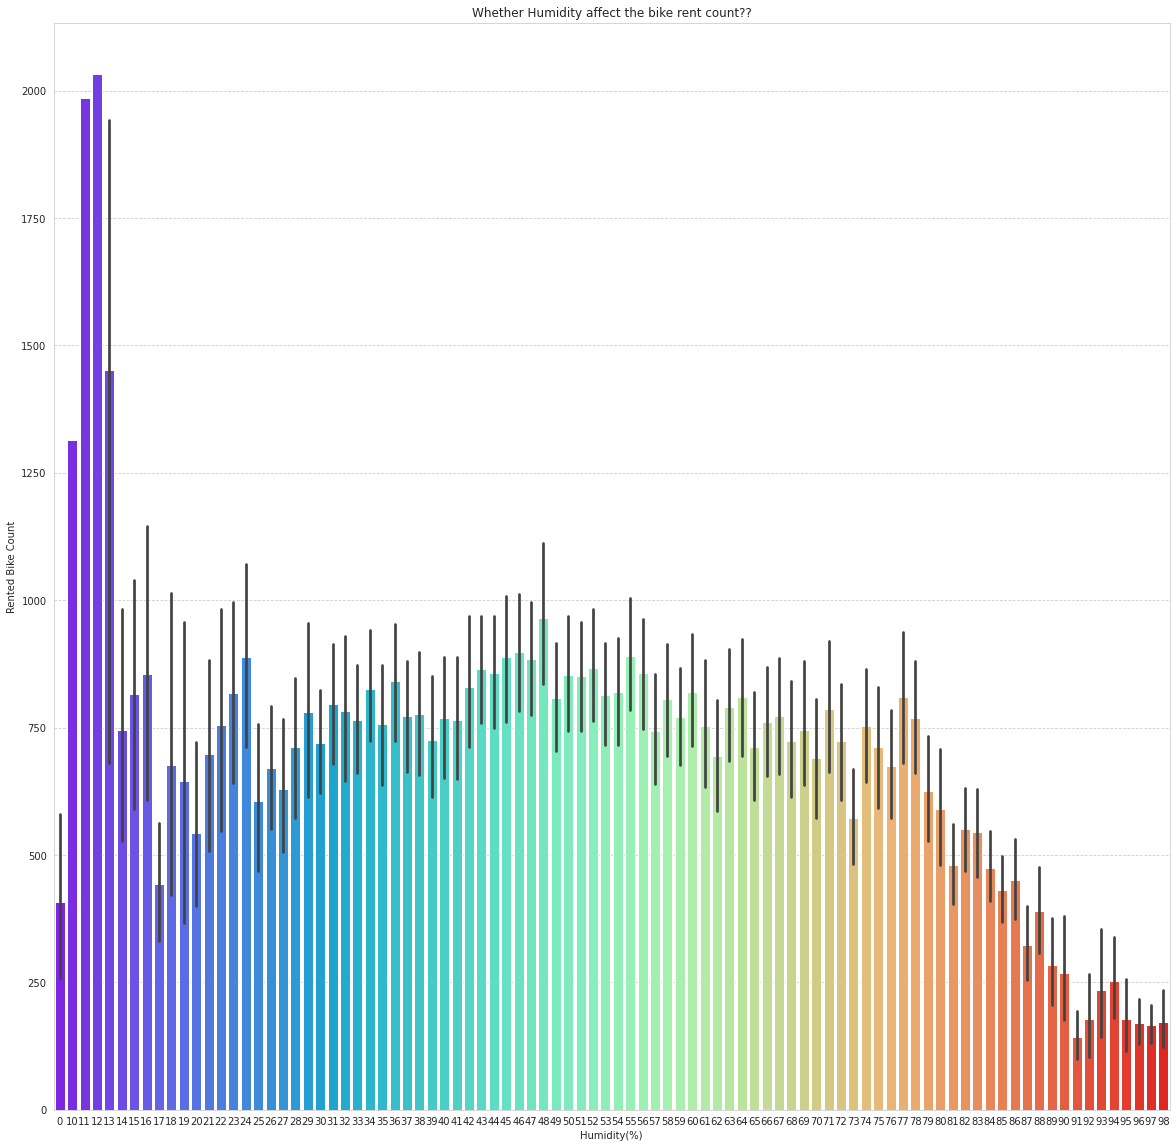

In [28]:
# Chart - 4 visualization code
plt.figure(figsize=(20,20))
sns.barplot(x='Humidity(%)',y='Rented Bike Count',data=df1, palette='rainbow')
plt.title("Whether Humidity affect the bike rent count??")

##### 1. Why did you pick the specific chart?

- Bar charts are used to represent and compare categorical data or discrete data to check univariate analysis as shown above.
- My objective was to analyse that, whether humidity is affective our business or not??

##### 2. What is/are the insight(s) found from the chart?

- Here i found that there no such effect of humidity upto some level but after 87% of humidity people are not considering this service and count is continuously decreasing as moving ahead

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Here i found after 87% people are not using this service and below that count is relatively similar so no such negative effect seen there

#### Chart - 5

Text(0.5, 1.0, 'Whether Wind speed (m/s) affect the bike rent count??')

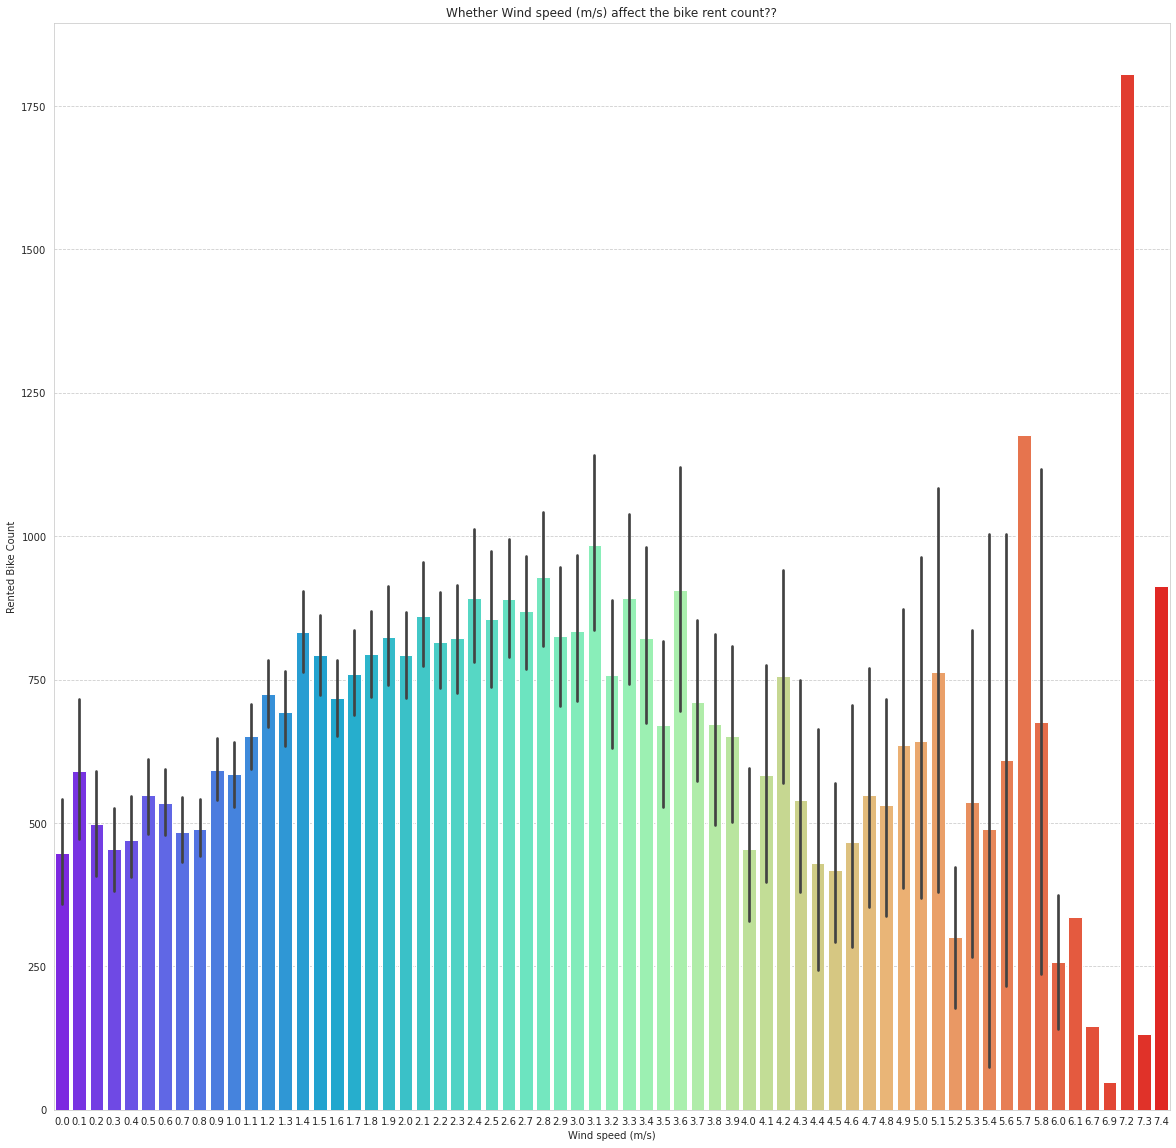

In [29]:
# Chart - 5 visualization code
plt.figure(figsize=(20,20))
sns.barplot(x='Wind speed (m/s)',y='Rented Bike Count',data=df1, palette='rainbow')
plt.title("Whether Wind speed (m/s) affect the bike rent count??")

##### 1. Why did you pick the specific chart?

- Bar charts are used to represent and compare categorical data or discrete data to analysis univariate analysis.
- My objective was to analyse that, whether wind speed is affective our business or not??

##### 2. What is/are the insight(s) found from the chart?

- Here we can see that there is not such important information getting. as data is majorly showing similar trend every where.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- No Such Relevent information found from this chart as trend is fluctuating more.

#### Chart - 6

Text(0.5, 1.0, 'Whether Visibility affect the bike rent count??')

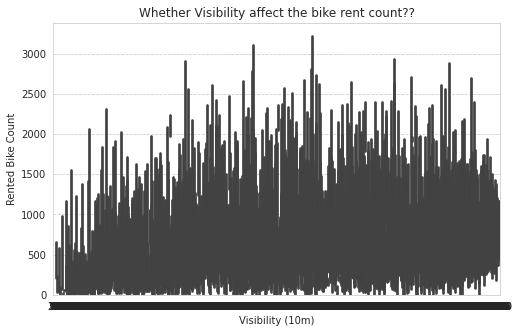

In [30]:
# Chart - 6 visualization code
plt.figure(figsize=(8,5))
sns.barplot(x='Visibility (10m)',y='Rented Bike Count',data=df1, palette='rainbow')
plt.title("Whether Visibility affect the bike rent count??")

##### 1. Why did you pick the specific chart?

- Bar charts are used to represent and compare categorical data or discrete data and to check univariate analysis as shown above.
- My objective was to analyse that, whether visibility is affective our business or not??

##### 2. What is/are the insight(s) found from the chart?

- Here we can infer that as visibility is low people are not using service much but still data is not giving much information so we cannot conclude much from this feature

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- No much information found from this chart

#### Chart - 7

Text(0.5, 1.0, 'Whether Snowfall affect the bike rent count??')

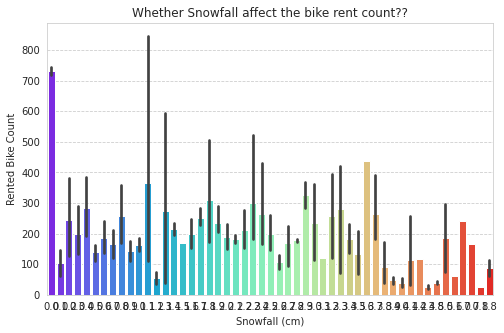

In [31]:
# Chart - 7 visualization code
plt.figure(figsize=(8,5))
sns.barplot(x='Snowfall (cm)',y='Rented Bike Count',data=df1, palette='rainbow')
plt.title("Whether Snowfall affect the bike rent count??")

##### 1. Why did you pick the specific chart?

- Bar charts are used to represent and compare categorical data or discrete data to check univariate analysis as shown above.
- My objective was to analyse that, whether Snowfall is affective our business or not??

##### 2. What is/are the insight(s) found from the chart?

- From this data we could not infer anything properly.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- No much information found from this chart

#### Chart - 8

Text(0.5, 1.0, 'Seasons Vs Rented Bike count')

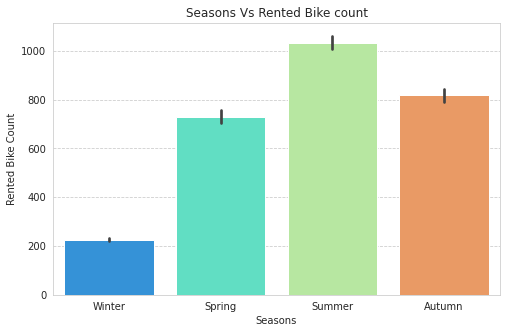

In [32]:
# Chart - 8 visualization code
plt.figure(figsize=(8,5))
sns.barplot(x='Seasons',y='Rented Bike Count',data=df1, palette='rainbow')
plt.title("Seasons Vs Rented Bike count")

##### 1. Why did you pick the specific chart?

- Bar charts are used to represent and compare categorical data or discrete data and to check univariate analysis.
- My objective was to analyse that, In which season bike rent count is minimum and maximum.

##### 2. What is/are the insight(s) found from the chart?

In the season column, we are able to understand that the demand is low in the winter season and high in winter season so we could have to focus more in winter season to increase the supply of bike count

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- We got both positive and negative growth here in some areas like we could see that in winter we could see very low count and in summer we could see high demand for bike rental so we could have to more focus required in winter season

#### Chart - 9

Text(0.5, 1.0, 'Holidays Vs Rented Bike count')

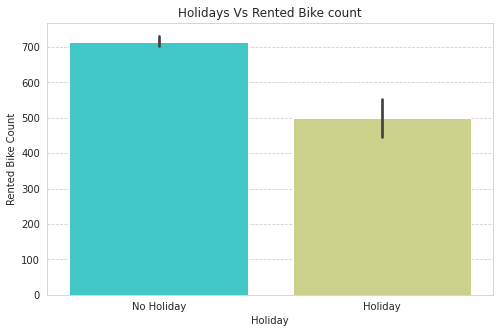

In [33]:
# Chart - 9 visualization code
plt.figure(figsize=(8,5))
sns.barplot(x='Holiday',y='Rented Bike Count',data=df1, palette='rainbow')
plt.title("Holidays Vs Rented Bike count")

##### 1. Why did you pick the specific chart?

- Bar charts are used to represent and compare categorical data or discrete data & univariate analysis.
- My objective was to analyse that, whether people are using rental service in holidays or not?

##### 2. What is/are the insight(s) found from the chart?

- Bike Rent count is more(i.e 700) when no holiday is there, so we could understand here is that during no holiday time people might use this service as transportation to offices, or other work,
- During Holidays count is less (i.e 500) which means people are not using service much.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Here we could see that during holidays we could see drastically down the count of bike so we could have to more focus on holidays where people could use more bikes like could give some holidays offers to them so they can motivate and use this service

#### Chart - 10

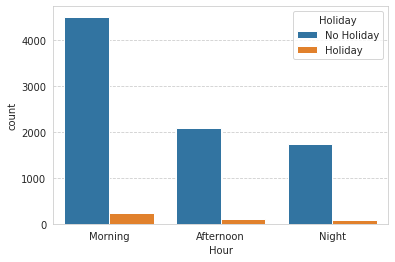

In [34]:
# Chart - 10 visualization code
sns.countplot(x='Hour', hue='Holiday', data=df1)

##### 1. Why did you pick the specific chart?

- Bar charts are used to represent and compare categorical data or discrete data and for bivariate analysis.
- My objective was to analyse that, In which Time Frame & Whether in weekend or week days people using bike rental service more.

##### 2. What is/are the insight(s) found from the chart?

- During week days people prefer bike more in morning, Afternoon and Night as well
- There is a scope of improvement during holidays by giving atractive offers or any special services to increase the count of rental bike

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Here we could see the concern area during holidays as people are very less using rental bike moreover people are using very less bike in night during holiday need more attention towards this

#### Chart - 11

Text(0.5, 1.0, 'Year Vs Rented Bike count')

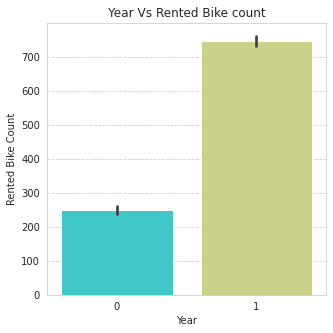

In [35]:
# Chart - 11 visualization code
plt.figure(figsize=(5,5))
sns.barplot(x='Year',y='Rented Bike Count',data=df1, palette='rainbow')
plt.title("Year Vs Rented Bike count")

##### 1. Why did you pick the specific chart?

- Bar charts are used to represent and compare categorical data or discrete data and for Univariate analysis.
- My objective was to analyse that, In which year there was a maximum bike rental count

##### 2. What is/are the insight(s) found from the chart?

- As we seen here that in 2017 bike rent count is less and in 2018 count is increase drastically why because due to starting of services people might not know about this so they uses less but when people start using this service count is gone more in 2018 so we could expect that in upcomming year count will further increase as people will use service more and more


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Here we are seeing very positive growth as compared with 2017 as count is increased drastically and people are going to start service more then previous year so we could expect even more count next year

#### Chart - 12

Text(0.5, 1.0, 'Rented Bike Count during Month with respect to Seasons')

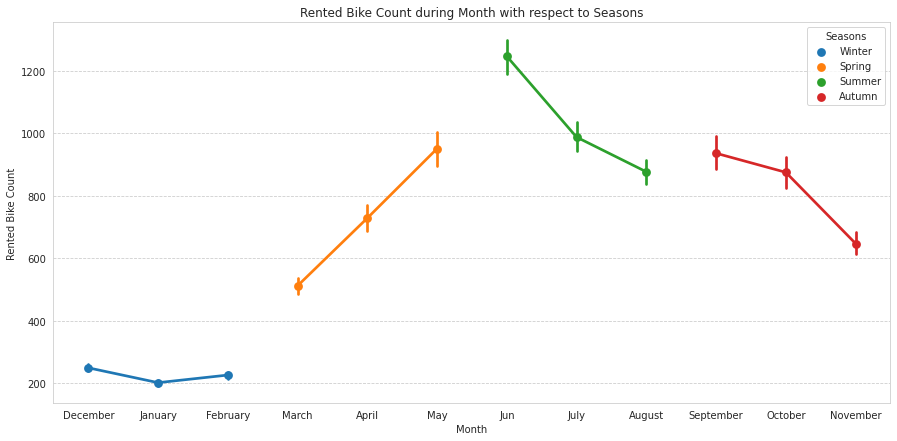

In [36]:
# Chart - 12 visualization code
plt.figure(figsize=(15,7))
sns.pointplot(x=df1["Month"],y=df1['Rented Bike Count'],hue=df1['Seasons'])
plt.title("Rented Bike Count during Month with respect to Seasons")

##### 1. Why did you pick the specific chart?

- Point plots, also known as dot plots, are a type of chart used to visualize the relationship between a categorical variable and a numerical variable

- I have use this chart to seperate all month and visualize which season has most count

##### 2. What is/are the insight(s) found from the chart?

- We are able to see here that in summer season (i.e month of Jun, July), there is maximum bike count there but after july month count is deacreasing why because in rainy season and after that winter season people using service less.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Here we could say that count is fluctuating, as we see till jun growth is continuously increasing and suddently growth goes down so we can say that people are not prefferring rental bike in rainy and winter season there we have scope of improvement

#### Chart - 13

In [37]:
numerical=df1[num_col].copy()
numerical

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254             -5.2           37               2.2   
1                   204             -5.5           38               0.8   
2                   173             -6.0           39               1.0   
3                   107             -6.2           40               0.9   
4                    78             -6.0           36               2.3   
...                 ...              ...          ...               ...   
8755               1003              4.2           34               2.6   
8756                764              3.4           37               2.3   
8757                694              2.6           39               0.3   
8758                712              2.1           41               1.0   
8759                584              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm)  Day  Year  
0              0.0            0.0    1     0  
1              0.0            0.0    1     0  
2              0.0            0.0    1     0  
3              0.0            0.0    1     0  
4              0.0            0.0    1     0  
...            ...            ...  ...   ...  
8755           0.0            0.0   30     1  
8756           0.0            0.0   30     1  
8757           0.0            0.0   30     1  
8758           0.0            0.0   30     1  
8759           0.0            0.0   30     1  

[8760 rows x 11 columns]

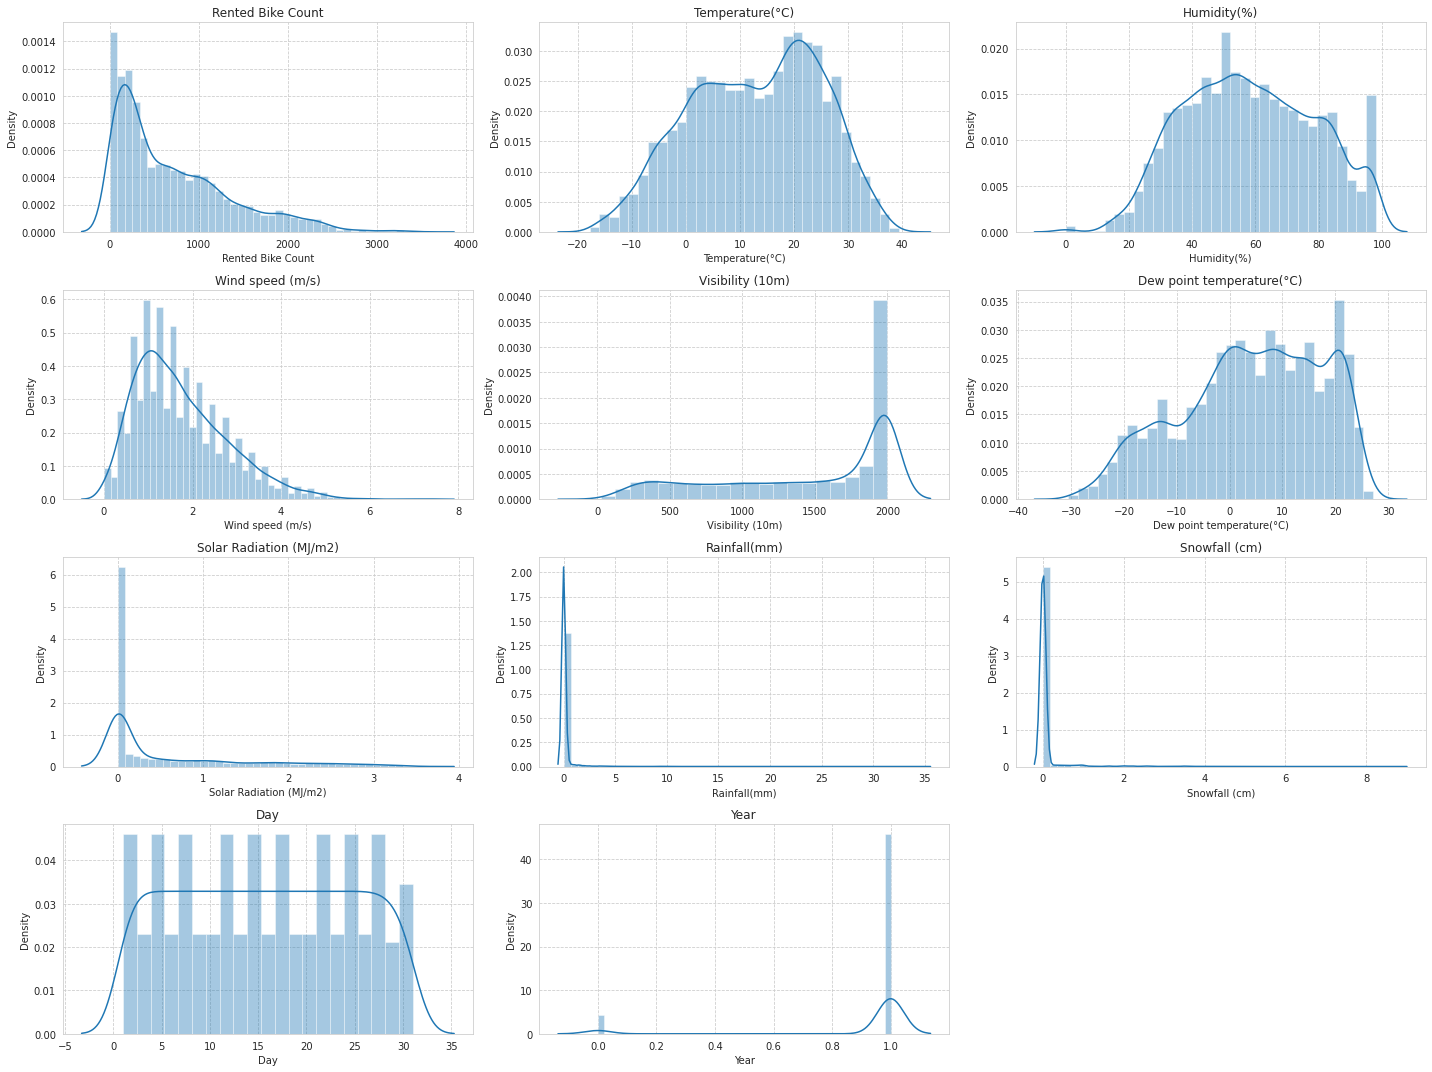

In [38]:
# Chart - 13 visualization code
n=1
plt.figure(figsize=(20,15))
for i in numerical.columns:
  plt.subplot(4,3,n)
  n=n+1
  sns.distplot(df1[i])
  plt.title(i)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

- A distribution plot is used to visualize the distribution of a single variable. The main purpose of a distribution plot is to show the shape, central tendency, and spread of the data. This can be useful for understanding the underlying distribution of the data, identifying any skewness or outliers, and determining if the data is symmetrical or asymmetrical.

- My Objective was to see the outlier & Skewness in the diffrent features

##### 2. What is/are the insight(s) found from the chart?

There are some columns which are  right skewed and some are left skewed,

- Right skewed columns are
Rented Bike Count (Its also our Dependent variable), Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm),

- Left skewed columns are
Visibility (10m), Dew point temperature(°C), Temperature(°C),Year

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- From this we could not get good model so our prediction may wrong so we need to check skewness and transform our data for better prediction

#### Chart - 14 - Correlation Heatmap

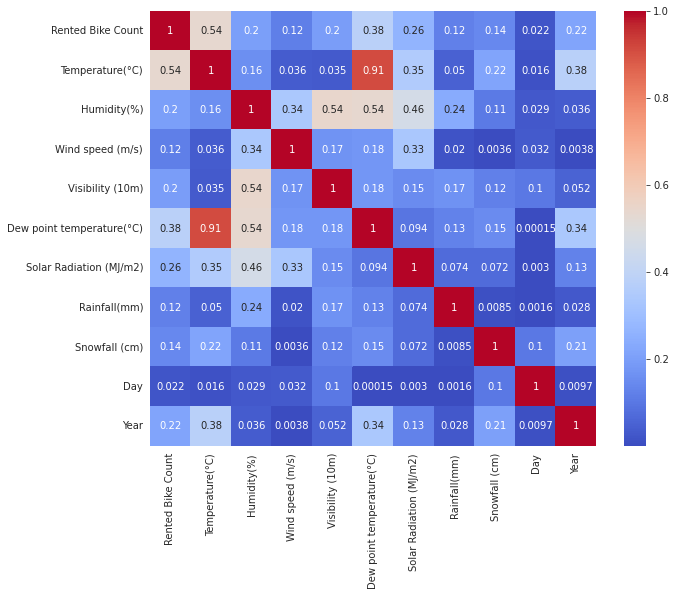

In [39]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))
sns.heatmap(abs(df1.corr()), cmap='coolwarm', annot=True)

##### 1. Why did you pick the specific chart?

- A heat map is a graphical representation of data where individual values are represented as colors. The main purpose of a heat map is to show the distribution of values across two dimensions and to show the relationship between different values. This can be useful for identifying patterns, trends, and outliers in the data
- here my objective was to check multi variate analysis means to check correlation of multi features with each other

##### 2. What is/are the insight(s) found from the chart?

From this graph we are able to see that there is multicollinearity in temperature(°C) and dew point temperature(°C) column so i will drop dew point temperature to handle multicolinearity

#### Chart - 15 - Pair Plot 

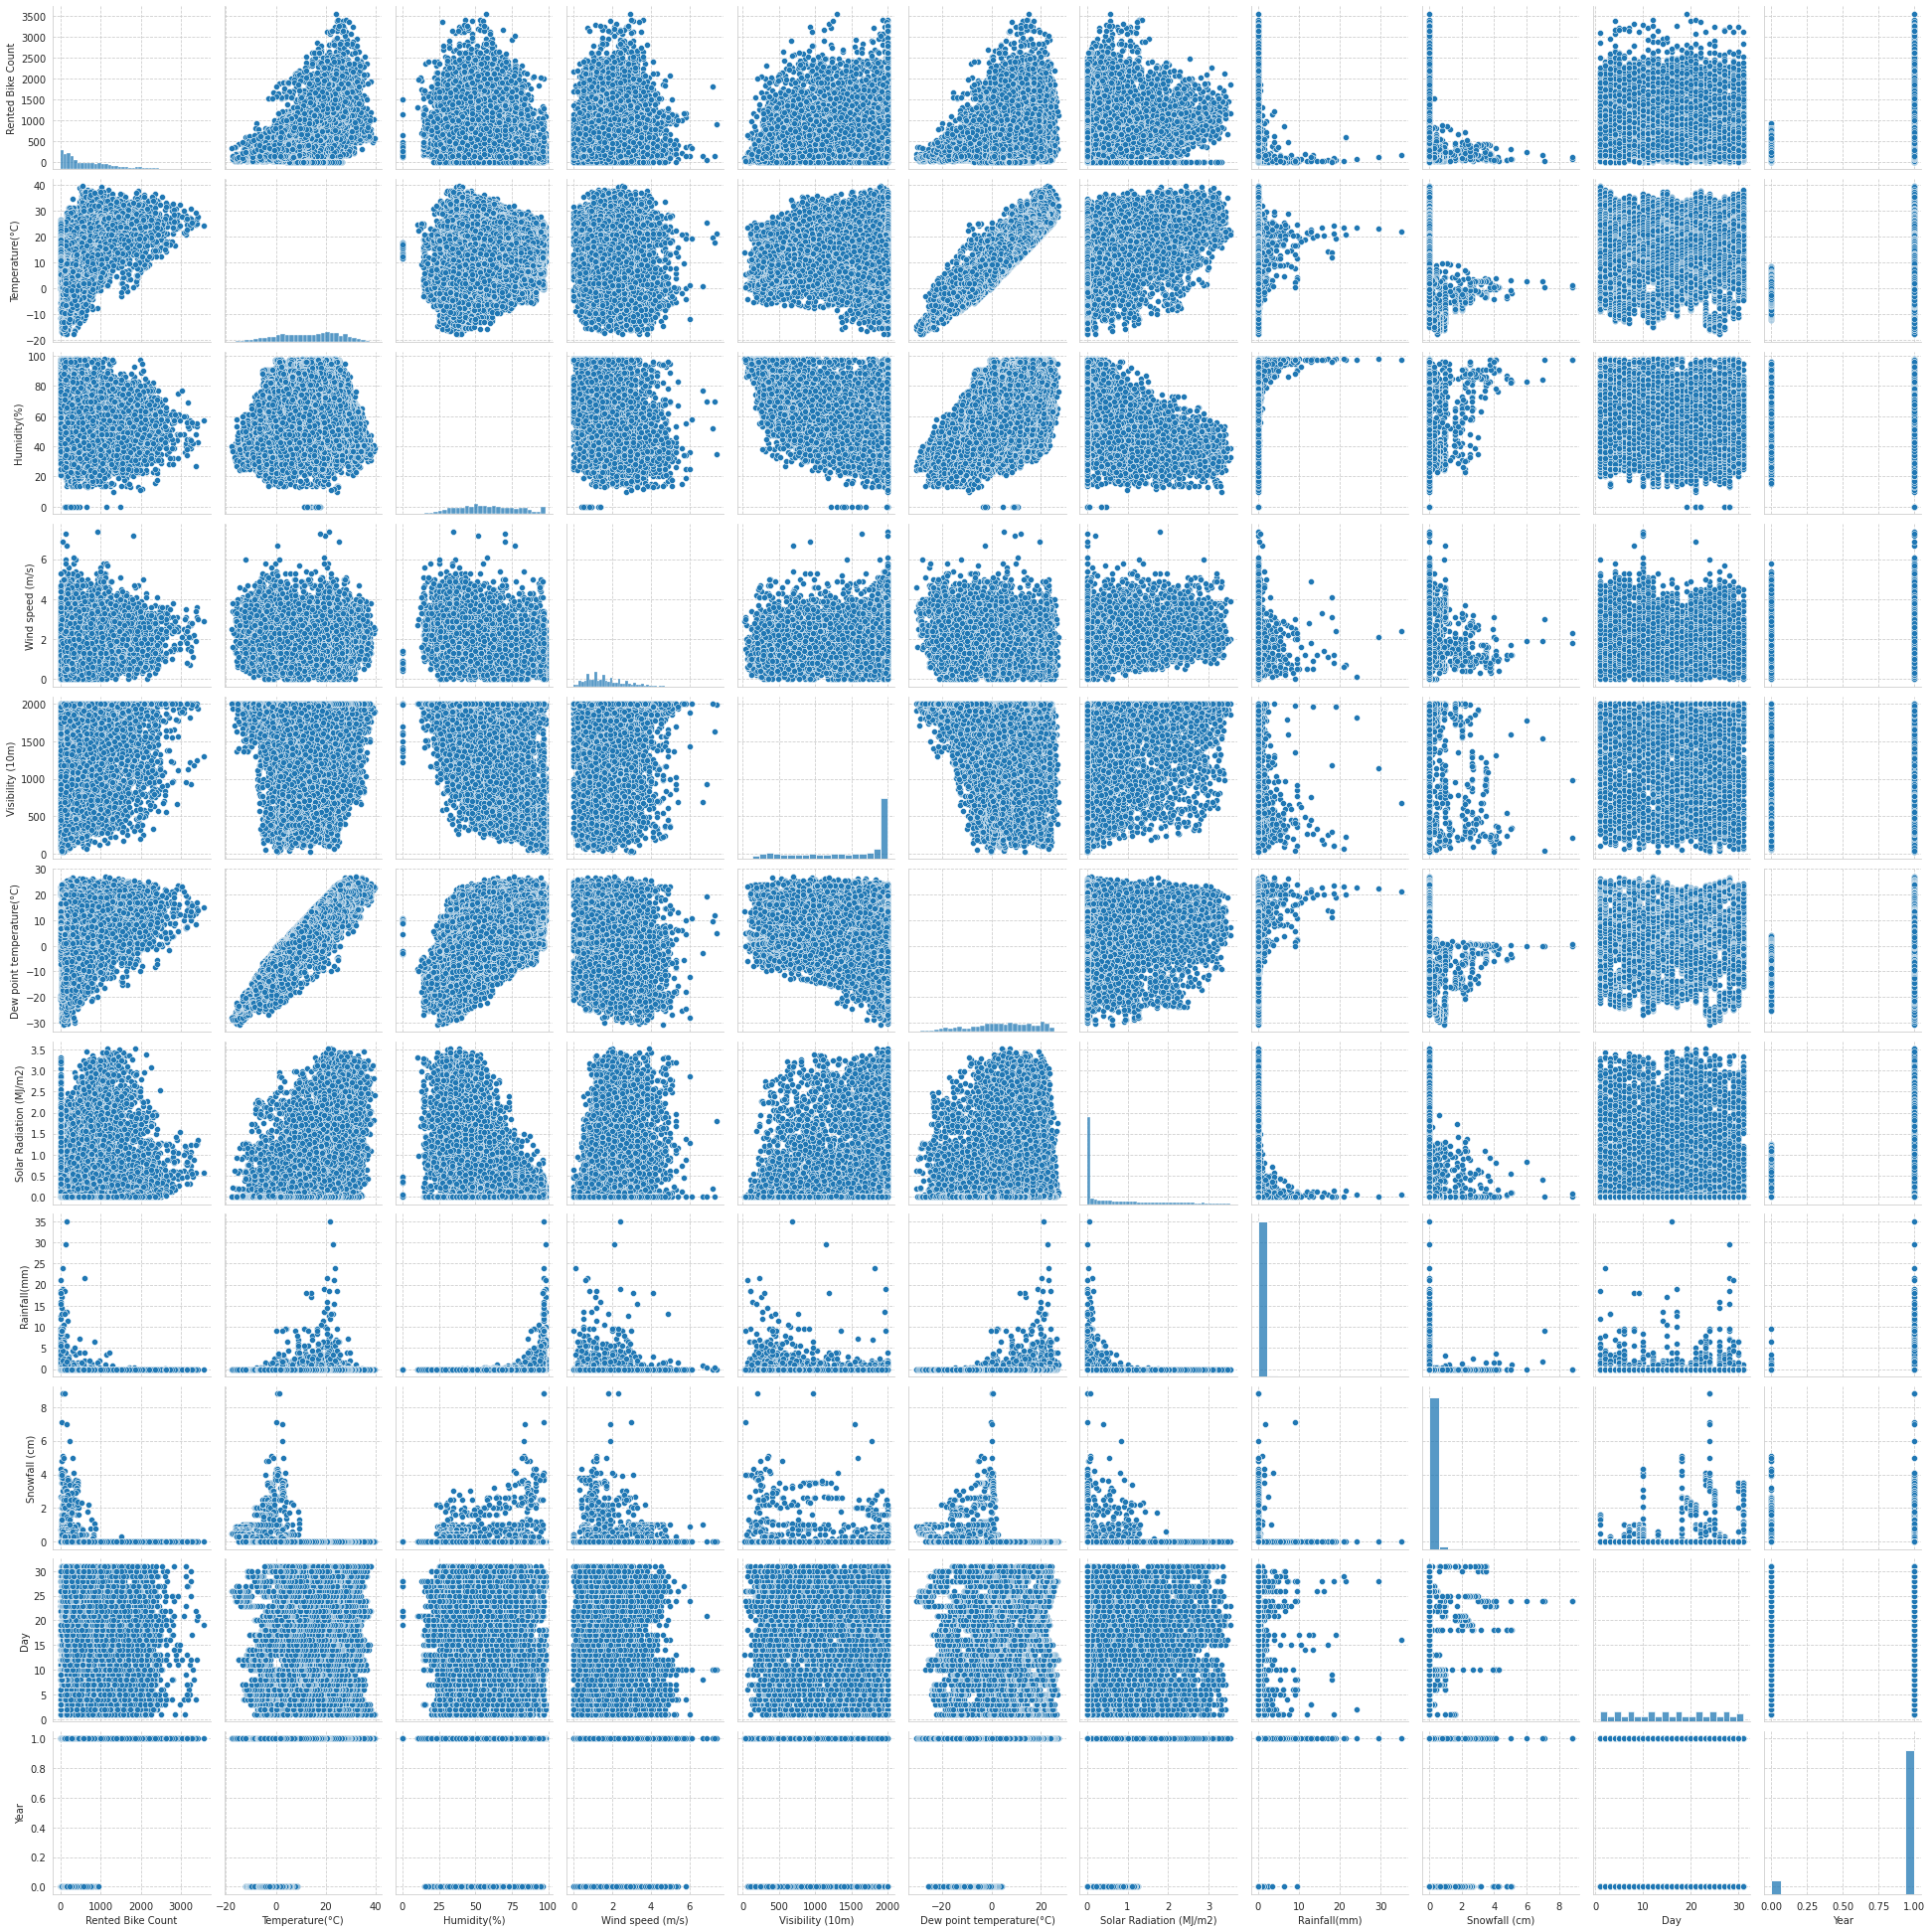

In [40]:
# Pair Plot visualization code
sns.pairplot(df1)
plt.show()

#### Chart - 16 - Box Plot 

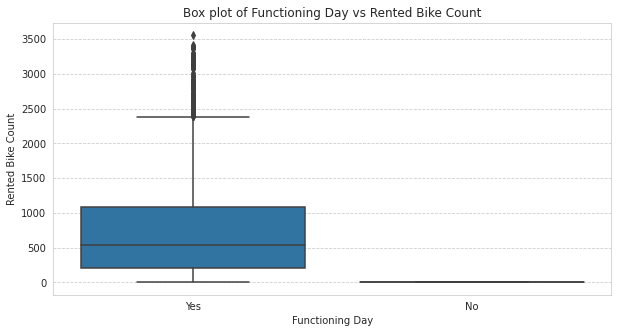

In [90]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Functioning Day', y='Rented Bike Count', data=categorical_columns)

# Add labels and title to the plot
plt.xlabel('Functioning Day')
plt.ylabel('Rented Bike Count')
plt.title('Box plot of Functioning Day vs Rented Bike Count')

# Show the plot
plt.show()

# Box-Plots interpretation

- These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

- If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

- On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Rating.

- In this data, all categorical predictors looks correlated with the Target variable.

- We confirm this by looking at the results of ANOVA test below

##### 1. Why did you pick the specific chart?

- To visualize the relationships between multiple variables in a single plot. Pair plots are particularly useful when working with multi-dimensional data, as they allow you to see the relationships between all of the variables in a single chart.

- From PaiPlot we can do multivariate analysis as shown above

- My objective for to use this chart to see correlation between diffrent column so see that whether my data has any linear correlation or not.

##### 2. What is/are the insight(s) found from the chart?

- I found that there is no much linear correlation between diffrent columns but between Dew point temperature and temperature we could see strong correlation

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

- Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
- ANOVA Test result: Probability of H0 being true

#### 2. Perform an appropriate statistical test.

In [82]:
# Perform Statistical Test to obtain P-Value
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, categorical_col):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in categorical_col:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [88]:
categorical_columns['Rented Bike Count']=df1['Rented Bike Count']

In [89]:
FunctionAnova(inpData=categorical_columns, TargetVariable='Rented Bike Count', categorical_col=cat_cols)

##### ANOVA Results ##### 

Hour is correlated with Rented Bike Count | P-Value: 5.162e-320
Seasons is correlated with Rented Bike Count | P-Value: 0.0
Holiday is correlated with Rented Bike Count | P-Value: 1.2156443235104595e-11
Functioning Day is correlated with Rented Bike Count | P-Value: 6.732210575545294e-83
Month is correlated with Rented Bike Count | P-Value: 0.0


['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Month']

Answer
- The results of ANOVA confirm our visual analysis using box plots above.

- All categorical variables are correlated with the Target variable. This is something we guessed by looking at the box plots!

- Final selected Categorical columns:

##### Which statistical test have you done to obtain P-Value?

- ANOVA (analysis of variance): used for comparing the means of three or more groups of continuous data

##### Why did you choose the specific statistical test?

- ANOVA is appropriate when comparing the means of three or more groups of continuous data. It is used to determine if there are any statistically significant differences between the means of the groups. The ANOVA test works by comparing the variability within each group to the variability between the groups. If the variability between the groups is significantly larger than the variability within the groups, then the means of the groups are considered to be significantly different from each other.


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Day                          0
Month                        0
Year                         0
dtype: int64


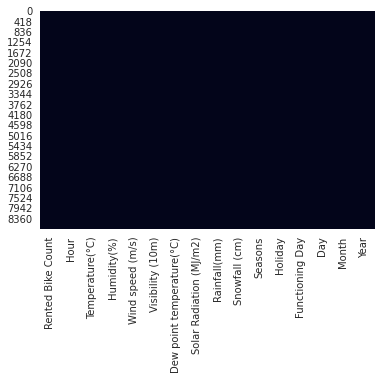

In [44]:
# Handling Missing Values & Missing Value Imputation
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df1.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df1.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

- There are no missing values to handle in the given dataset.

### 2. Handling Outliers

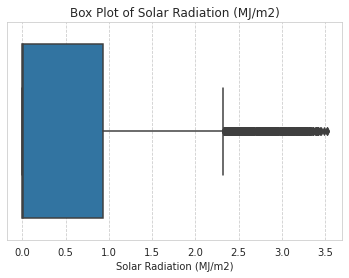

In [45]:
# Handling Outliers & Outlier treatments
sns.boxplot(x=df1["Solar Radiation (MJ/m2)"])

# Add title and labels
plt.title("Box Plot of Solar Radiation (MJ/m2)")
plt.xlabel("Solar Radiation (MJ/m2)")

# Show plot
plt.show()

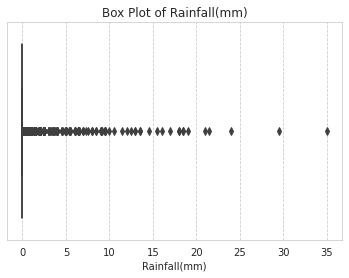

In [46]:
sns.boxplot(x=df1["Rainfall(mm)"])

# Add title and labels
plt.title("Box Plot of Rainfall(mm)")
plt.xlabel("Rainfall(mm)")

# Show plot
plt.show()

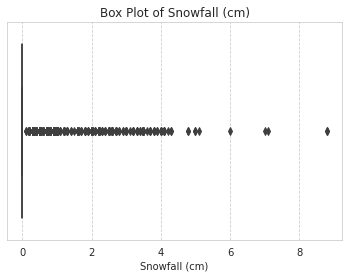

In [47]:
sns.boxplot(x=df1["Snowfall (cm)"])

# Add title and labels
plt.title("Box Plot of Snowfall (cm)")
plt.xlabel("Snowfall (cm)")

# Show plot
plt.show()

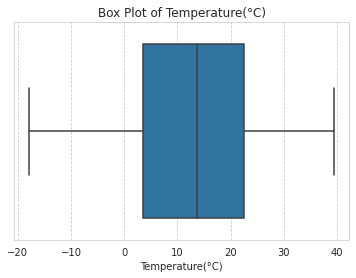

In [48]:
sns.boxplot(x=df1["Temperature(°C)"])

# Add title and labels
plt.title("Box Plot of Temperature(°C)")
plt.xlabel("Temperature(°C)")

# Show plot
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [49]:
df1.drop(columns=['Dew point temperature(°C)'],inplace=True)

In [50]:
df1

Rented Bike Count     Hour  Temperature(°C)  Humidity(%)  \
0                   254  Morning             -5.2           37   
1                   204  Morning             -5.5           38   
2                   173  Morning             -6.0           39   
3                   107  Morning             -6.2           40   
4                    78  Morning             -6.0           36   
...                 ...      ...              ...          ...   
8755               1003    Night              4.2           34   
8756                764    Night              3.4           37   
8757                694    Night              2.6           39   
8758                712    Night              2.1           41   
8759                584    Night              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  \
0                  2.2              2000                      0.0   
1                  0.8              2000                      0.0   
2                  1.0              2000                      0.0   
3                  0.9              2000                      0.0   
4                  2.3              2000                      0.0   
...                ...               ...                      ...   
8755               2.6              1894                      0.0   
8756               2.3              2000                      0.0   
8757               0.3              1968                      0.0   
8758               1.0              1859                      0.0   
8759               1.3              1909                      0.0   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Day  \
0              0.0            0.0  Winter  No Holiday             Yes    1   
1              0.0            0.0  Winter  No Holiday             Yes    1   
2              0.0            0.0  Winter  No Holiday             Yes    1   
3              0.0            0.0  Winter  No Holiday             Yes    1   
4              0.0            0.0  Winter  No Holiday             Yes    1   
...            ...            ...     ...         ...             ...  ...   
8755           0.0            0.0  Autumn  No Holiday             Yes   30   
8756           0.0            0.0  Autumn  No Holiday             Yes   30   
8757           0.0            0.0  Autumn  No Holiday             Yes   30   
8758           0.0            0.0  Autumn  No Holiday             Yes   30   
8759           0.0            0.0  Autumn  No Holiday             Yes   30   

         Month  Year  
0     December     0  
1     December     0  
2     December     0  
3     December     0  
4     December     0  
...        ...   ...  
8755  November     1  
8756  November     1  
8757  November     1  
8758  November     1  
8759  November     1  

[8760 rows x 15 columns]

In [51]:
# Encode your categorical columns
final_df_for_model=pd.get_dummies(df1,drop_first=True,sparse=True)

In [52]:
final_df_for_model

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254             -5.2           37               2.2   
1                   204             -5.5           38               0.8   
2                   173             -6.0           39               1.0   
3                   107             -6.2           40               0.9   
4                    78             -6.0           36               2.3   
...                 ...              ...          ...               ...   
8755               1003              4.2           34               2.6   
8756                764              3.4           37               2.3   
8757                694              2.6           39               0.3   
8758                712              2.1           41               1.0   
8759                584              1.9           43               1.3   

      Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0                 2000                      0.0           0.0            0.0   
1                 2000                      0.0           0.0            0.0   
2                 2000                      0.0           0.0            0.0   
3                 2000                      0.0           0.0            0.0   
4                 2000                      0.0           0.0            0.0   
...                ...                      ...           ...            ...   
8755              1894                      0.0           0.0            0.0   
8756              2000                      0.0           0.0            0.0   
8757              1968                      0.0           0.0            0.0   
8758              1859                      0.0           0.0            0.0   
8759              1909                      0.0           0.0            0.0   

      Day  Year  ...  Month_December  Month_February  Month_January  \
0       1     0  ...               1               0              0   
1       1     0  ...               1               0              0   
2       1     0  ...               1               0              0   
3       1     0  ...               1               0              0   
4       1     0  ...               1               0              0   
...   ...   ...  ...             ...             ...            ...   
8755   30     1  ...               0               0              0   
8756   30     1  ...               0               0              0   
8757   30     1  ...               0               0              0   
8758   30     1  ...               0               0              0   
8759   30     1  ...               0               0              0   

      Month_July  Month_Jun  Month_March  Month_May  Month_November  \
0              0          0            0          0               0   
1              0          0            0          0               0   
2              0          0            0          0               0   
3              0          0            0          0               0   
4              0          0            0          0               0   
...          ...        ...          ...        ...             ...   
8755           0          0            0          0               1   
8756           0          0            0          0               1   
8757           0          0            0          0               1   
8758           0          0            0          0               1   
8759           0          0            0          0               1   

      Month_October  Month_September  
0                 0                0  
1                 0                0  
2                 0                0  
3                 0                0  
4                 0                0  
...             ...              ...  
8755              0                0  
8756              0                0  
8757              0                0  
8758              0                0  
8759     

#### What all categorical encoding techniques have you used & why did you use those techniques?

- I have used One-hot encoding as it is used to represent categorical data as binary vectors. Each category is represented by a binary vector where only one element is 1 and the rest are 0.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

There are no text columns in the given dataset which I am working on. So, Skipping this part

#### 1. Expand Contraction

In [53]:
# Expand Contraction

#### 2. Lower Casing

In [54]:
# Lower Casing

#### 3. Removing Punctuations

In [55]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [56]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [57]:
# Remove Stopwords

In [58]:
# Remove White spaces

#### 6. Rephrase Text

In [59]:
# Rephrase Text

#### 7. Tokenization

In [60]:
# Tokenization

#### 8. Text Normalization

In [61]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [62]:
# POS Taging

#### 10. Text Vectorization

In [63]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [64]:
# Manipulate Features to minimize feature correlation and create new features


#### 2. Feature Selection

In [91]:
# Select your features wisely to avoid overfitting
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [92]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

variables        VIF
0          Temperature(°C)   3.286952
1              Humidity(%)   8.198857
2         Wind speed (m/s)   4.184472
3         Visibility (10m)   5.623963
4  Solar Radiation (MJ/m2)   2.329587
5             Rainfall(mm)   1.079605
6            Snowfall (cm)   1.155265
7                      Day   3.809548
8                     Year  11.975862

##### What all feature selection methods have you used  and why?

- VIF (Variance Inflation Factor) is a statistical metric used in multiple regression analysis to assess the presence of multicollinearity between independent variables. Multicollinearity occurs when two or more independent variables are highly correlated, which can cause problems with the interpretation of the regression coefficients and make it difficult to determine the true relationship between the independent variables and the dependent variable.

##### Which all features you found important and why?

In the context of feature selection, one approach is to use variance inflation factor (VIF) to identify highly correlated features, which can be removed from the model to reduce multicollinearity and improve the stability of regression coefficients.

Based on the VIF values provided, it appears that the "Humidity(%)" and "Year" features have relatively high VIF values of 8.198857 and 11.975862, respectively. A general rule of thumb is that a VIF greater than 5 indicates high multicollinearity, while a VIF greater than 10 indicates very high multicollinearity. Therefore, the "Humidity(%)" and "Year" features are likely highly correlated with other features in the dataset.

In this case, it may be a good idea to consider removing one or both of these features from the model during the feature selection process to reduce multicollinearity and improve the stability of the regression coefficients. 

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

# Checking Distribution of data for Dependent Variable i.e (Rented Bike Count)

Text(0.5, 1.0, 'Square root')

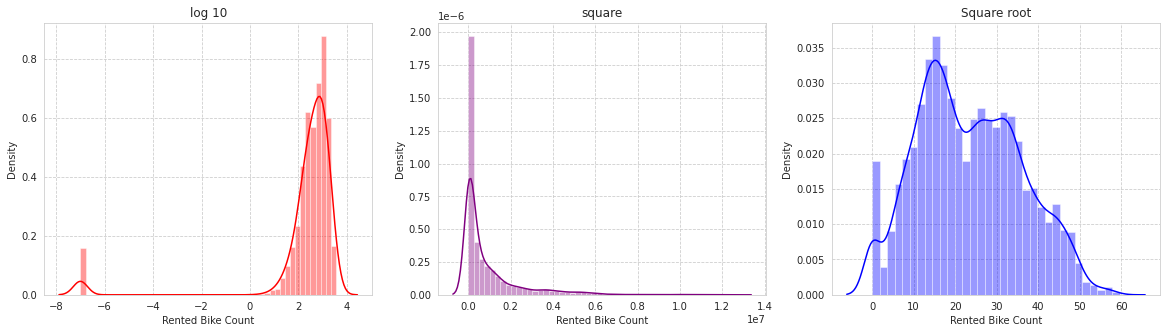

In [93]:
# Transform Your data
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(final_df_for_model['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((final_df_for_model['Rented Bike Count']**2),ax=axes[1],color='purple').set_title("square")
sns.distplot(np.sqrt(final_df_for_model['Rented Bike Count']),ax=axes[2], color='blue').set_title("Square root")

- I have used Distribution plot to check which transformation technique giving normal data so we could infer here that using SQRT transformation giving best result as compare to others

# Applying Power Transformation on data for independent variable

In [95]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
final_df_for_model['Temperature(°C)'] = scaler.fit_transform(final_df_for_model[['Temperature(°C)']].values)
final_df_for_model['Temperature(°C)']

0      -1.456985
1      -1.479261
2      -1.516320
3      -1.531120
4      -1.516320
          ...   
8755   -0.749187
8756   -0.810168
8757   -0.870861
8758   -0.908669
8759   -0.923768
Name: Temperature(°C), Length: 8760, dtype: float64

In [96]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
final_df_for_model['Rainfall(mm)'] = scaler.fit_transform(final_df_for_model[['Rainfall(mm)']].values)
final_df_for_model['Rainfall(mm)']

0      -0.252859
1      -0.252859
2      -0.252859
3      -0.252859
4      -0.252859
          ...   
8755   -0.252859
8756   -0.252859
8757   -0.252859
8758   -0.252859
8759   -0.252859
Name: Rainfall(mm), Length: 8760, dtype: float64

In [97]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
final_df_for_model['Snowfall (cm)'] = scaler.fit_transform(final_df_for_model[['Snowfall (cm)']].values)
final_df_for_model['Snowfall (cm)']

0      -0.230785
1      -0.230785
2      -0.230785
3      -0.230785
4      -0.230785
          ...   
8755   -0.230785
8756   -0.230785
8757   -0.230785
8758   -0.230785
8759   -0.230785
Name: Snowfall (cm), Length: 8760, dtype: float64

In [98]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
final_df_for_model['Wind speed (m/s)'] = scaler.fit_transform(final_df_for_model[['Wind speed (m/s)']].values)
final_df_for_model['Wind speed (m/s)']

0       0.618103
1      -0.923651
2      -0.640327
3      -0.778203
4       0.700184
          ...   
8755    0.932074
8756    0.700184
8757   -1.801586
8758   -0.640327
8759   -0.265185
Name: Wind speed (m/s), Length: 8760, dtype: float64

In [99]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
final_df_for_model['Rented Bike Count'] = scaler.fit_transform(final_df_for_model[['Rented Bike Count']].values)
final_df_for_model['Rented Bike Count']

0      -0.530004
1      -0.676497
2      -0.779424
3      -1.047379
4      -1.200315
          ...   
8755    0.695553
8756    0.403665
8757    0.307082
8758    0.332501
8759    0.141594
Name: Rented Bike Count, Length: 8760, dtype: float64

In [100]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
final_df_for_model['Humidity(%)'] = scaler.fit_transform(final_df_for_model[['Humidity(%)']].values)
final_df_for_model['Humidity(%)']

0      -1.038829
1      -0.986482
2      -0.934363
3      -0.882465
4      -1.091410
          ...   
8755   -1.197308
8756   -1.038829
8757   -0.934363
8758   -0.830782
8759   -0.728037
Name: Humidity(%), Length: 8760, dtype: float64

In [101]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
final_df_for_model['Visibility (10m)'] = scaler.fit_transform(final_df_for_model[['Visibility (10m)']].values)
final_df_for_model['Visibility (10m)']

0       0.978214
1       0.978214
2       0.978214
3       0.978214
4       0.978214
          ...   
8755    0.762392
8756    0.978214
8757    0.912535
8758    0.692237
8759    0.792629
Name: Visibility (10m), Length: 8760, dtype: float64

In [102]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
final_df_for_model['Day'] = scaler.fit_transform(final_df_for_model[['Day']].values)
final_df_for_model['Day']

0      -1.891503
1      -1.891503
2      -1.891503
3      -1.891503
4      -1.891503
          ...   
8755    1.502539
8756    1.502539
8757    1.502539
8758    1.502539
8759    1.502539
Name: Day, Length: 8760, dtype: float64

In [103]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
final_df_for_model['Year'] = scaler.fit_transform(final_df_for_model[['Year']].values)
final_df_for_model['Year']

0      -3.282407
1      -3.282407
2      -3.282407
3      -3.282407
4      -3.282407
          ...   
8755    0.304655
8756    0.304655
8757    0.304655
8758    0.304655
8759    0.304655
Name: Year, Length: 8760, dtype: float64

### 6. Data Scaling

##### Which method have you used to scale you data and why?

- I have Used Standard Scaler for Data Scaling

### 7. Dimesionality Reduction

## I have not used any Dimension Reduction Technique

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [68]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [69]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [70]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [105]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
from sklearn.model_selection import train_test_split
X = final_df_for_model.drop(columns='Rented Bike Count')
y = final_df_for_model['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [107]:
regression.score(X_train,y_train)

0.721563412045467

In [108]:
regression.score(X_test,y_test)

0.7091045781209163

In [109]:
reg_pred = regression.predict(X_test)

In [111]:
def score_metrics(actual,predicted):
  mae = mean_absolute_error(actual**2,predicted**2)
  print('mean absolute error is  :',mae)
  mse = mean_squared_error(actual**2,predicted**2)
  print('mean squared error is  :',mse)
  print('Root mean squared error is  :',np.sqrt(mse))
  print("R2 score is  :",r2_score(actual**2,predicted**2))

In [112]:
score_metrics(y_test,reg_pred)

mean absolute error is  : 0.6128840633590783
mean squared error is  : 0.9828862405503764
Root mean squared error is  : 0.9914061935202828
R2 score is  : 0.297302257410456


In [113]:
regression.coef_

array([ 4.73837137e-01, -1.57824519e-01,  2.90357424e-02,  2.46130217e-02,
       -3.90092747e-03, -2.56694656e-01,  7.00866655e-03, -1.56096517e-03,
       -6.51866352e-03, -3.38001736e-01,  2.27829312e-01, -5.73355735e-02,
       -1.16665638e-01, -3.37286084e-01,  2.57770784e-01,  2.70796404e+00,
       -3.04958220e-01,  1.81727135e-03, -2.00173487e-01, -1.38929868e-01,
       -1.22785898e-01,  3.11078481e-01, -1.36933244e-01,  1.44351497e-01,
        1.74239677e-01,  2.87017222e-01,  5.00303959e-02])

In [114]:
regression.intercept_

-2.6054684625525746

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

    =========================================================    Evalution Graph    ===================================================



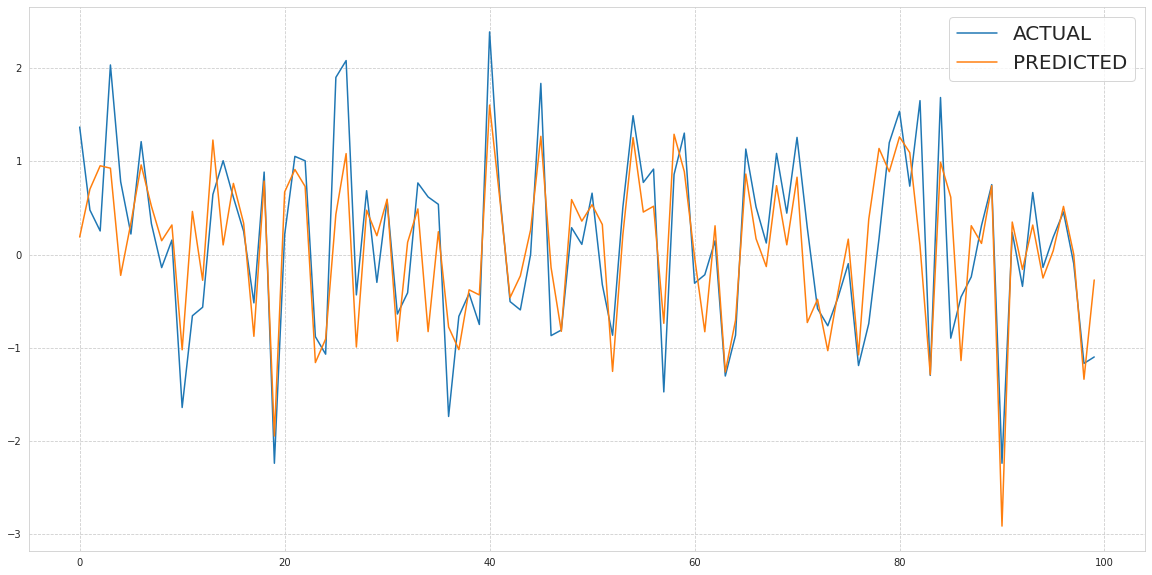

In [116]:
# Visualizing evaluation Metric Score chart
print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 

plt.figure(figsize=(20,10))
plt.plot(np.array(y_test[:100]))
plt.plot(reg_pred[:100])    
plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
plt.show()

- the model has an MAE of 0.6119, indicating that, on average, the predictions differ from the actual values by around 0.61. The MSE is 0.9826, which is the average of the squared differences between the predicted and actual values. The RMSE is the square root of the MSE and is equal to 0.9912, indicating that the average residual magnitude is around 0.99. The R2 score of 0.2975 suggests that the model explains around 30% of the variance in the target variable.

- Above Model has Test Accuracy around 70 % and R2 score is 0.29 so we could say that model is performing similar for train and test data so no overfitting but R2 score is low so we can say that model is not capturing relevant information from target variable so we need to go for another models for better improvment of our prediction

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [117]:
# Visualizing evaluation Metric Score chart
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
pipe_PF = Pipeline((
("poly",PolynomialFeatures(degree=2)),
("lr", LinearRegression()),
))
pipe_PF.fit(X_train,y_train)
print("Training R2")
print(pipe_PF.score(X_train,y_train))
print("Testing R2")
print(pipe_PF.score(X_test,y_test))

Training R2
0.8199943523035507
Testing R2
0.7864059276371802


In [121]:
reg_pred1 = pipe_PF.predict(X_test)

In [122]:
score_metrics(y_test,reg_pred)

mean absolute error is  : 0.48559352684446183
mean squared error is  : 0.5796541846262386
Root mean squared error is  : 0.7613502378184686
R2 score is  : 0.5855861337611594


#### 2. Cross- Validation & Hyperparameter Tuning

In [75]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

- Above Model has Test Accuracy around 78 % and Training score is 81% so we could say that model is performing similar for train and test data so no overfitting and it is performing well then linear regression.

- Moreover we can see that R2 score is incresed then previous one so we can say that this model will work better then linear regression.

- For Our business improvement we could consider polynomial feature for model prediction if we consider Linear Regression and Polynomial due to above reason

### ML Model - 3

In [126]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
L1 = Lasso(alpha=0.001, max_iter=1000)
L1.fit(X_train,y_train)
L1.score(X_train,y_train)

0.7213336634520271

In [127]:
L1.score(X_test,y_test)

0.7093880552732512

In [128]:
L1_pred = L1.predict(X_test)
score_metrics(y_test,L1_pred)

mean absolute error is  : 0.6125995376654868
mean squared error is  : 0.9734789501224219
Root mean squared error is  : 0.9866503687337383
R2 score is  : 0.3040278391460455


In [129]:
L1.coef_

array([ 4.66834716e-01, -1.54919245e-01,  2.63691820e-02,  2.47121471e-02,
       -0.00000000e+00, -2.56232086e-01,  5.16643784e-03, -0.00000000e+00,
       -4.29033827e-02, -3.41077645e-01,  2.22089175e-01, -8.86000589e-04,
       -0.00000000e+00, -4.32333842e-01,  2.33853336e-01,  2.66337380e+00,
       -3.57268084e-01,  0.00000000e+00, -5.39191907e-02, -0.00000000e+00,
       -1.76059046e-01,  2.31059203e-01, -1.40233851e-01,  1.19912330e-01,
        2.00276399e-01,  3.13663794e-01,  7.82616554e-02])

In [130]:
L1.intercept_

-2.5708527740983382

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

    =========================================================    Evalution Graph    ===================================================



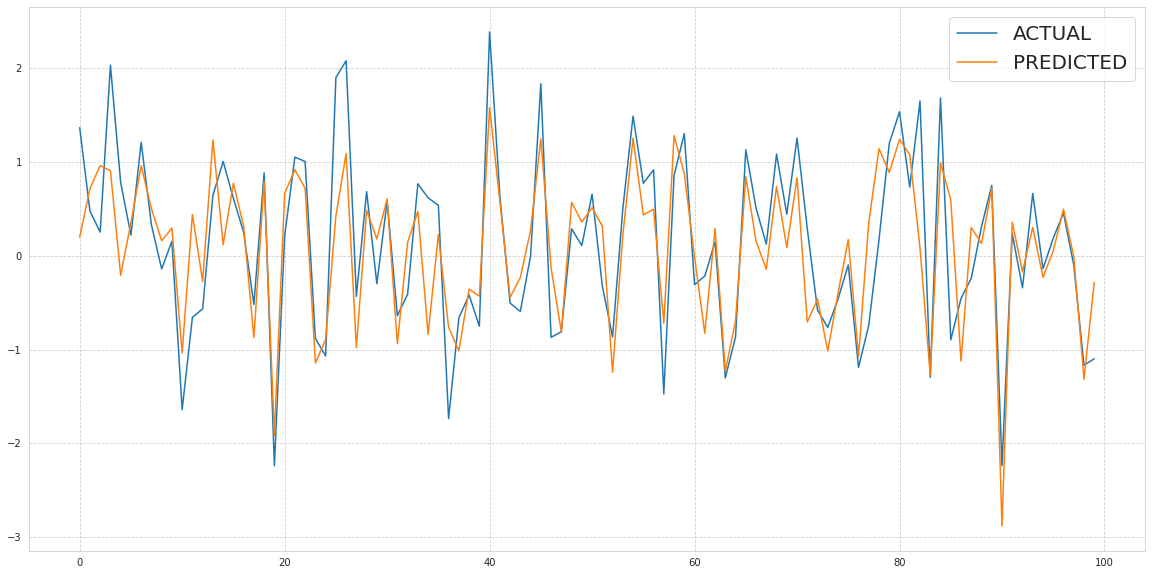

In [135]:
# Visualizing evaluation Metric Score chart
print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 

plt.figure(figsize=(20,10))
plt.plot(np.array(y_test[:100]))
plt.plot(L1_pred[:100])    
plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
plt.show()


- Comparing the evaluation metrics of the linear regression model and the Lasso regularization model, we can see that the Lasso model has a slightly lower MAE, MSE, and RMSE, indicating that it is making more accurate predictions. However, the improvement is relatively small.

- The R2 score of the Lasso model is also slightly higher than that of the linear regression model, indicating that it is able to explain a slightly higher percentage of the variance in the target variable.

- The train and test accuracies of the Lasso model are similar to those of the linear regression model, indicating that the Lasso model is not overfitting or underfitting.


#### 2. Cross- Validation & Hyperparameter Tuning

In [131]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [132]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -0.2821112154686142


In [133]:
lasso_pred = lasso_regressor.predict(X_test)
score_metrics(y_test,lasso_pred)

mean absolute error is  : 0.6128498686002134
mean squared error is  : 0.9818864063616809
Root mean squared error is  : 0.9909018146928993
R2 score is  : 0.29801707179931836


##### Which hyperparameter optimization technique have you used and why?

I have used GridsearchCV and the reason is mentioned below,

Grid Search: Grid search involves specifying a list of values for each hyperparameter and then exhaustively searching through all possible combinations of hyperparameters to find the optimal combination.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Overall, based on the evaluation metrics, it seems that the Lasso regularization model performs slightly better than the linear regression model. However, the difference in performance is relatively small, and it may not be worth the additional computational complexity of using a regularization technique.

# ML Model - 4

In [136]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
pipe = Pipeline((
("sc",StandardScaler()),
("lr", GradientBoostingRegressor()),
))
pipe.fit(X_train,y_train)
print("Training R2")
print(pipe.score(X_train,y_train))
print("Testing R2")
print(pipe.score(X_test,y_test))

Training R2
0.84230472602613
Testing R2
0.827433303067939


In [138]:
reg_pred2 = pipe.predict(X_test)

In [139]:
score_metrics(y_test,reg_pred)

mean absolute error is  : 0.46013642977623975
mean squared error is  : 0.5193371844528087
Root mean squared error is  : 0.7206505286564416
R2 score is  : 0.6287087435943264


### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Comparing the Gradient Boosting Regressor model and the Polynomial Feature model as we consider as best model till time now based on the evaluation metrics we can see that the Gradient Boosting Regressor model has a lower MAE, MSE, and RMSE, indicating that it is making more accurate predictions. The R2 score of the Gradient Boosting Regressor model is also higher than that of the Polynomial Feature model, indicating that it is able to explain a higher percentage of the variance in the target variable.

- Based on these evaluation metrics, we can conclude that the Gradient Boosting Regressor model outperforms the Polynomial Feature model for this particular problem

- For our business problem we could consider Gradient Boosting Regressor as a best model due to above reasons...

# ML Model - 5

In [140]:
from sklearn.svm import SVR
# from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [141]:
regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = regressor.predict(X_test)

# Evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  0.28906185585620925


In [142]:
from sklearn.metrics import r2_score

# Predict the target variable for the test data
y_pred = regressor.predict(X_test)

In [143]:
# Calculate the R2 score, which is a measure of the accuracy of the model
r2 = r2_score(y_test, y_pred)

# Print the R2 score
print("R2 Score:", r2)

R2 Score: 0.707192489891159


In [144]:
pipe_SVR = Pipeline((
("sc",StandardScaler()),
("lr", SVR()),
))
pipe.fit(X_train,y_train)
print("Training R2")
print(pipe.score(X_train,y_train))
print("Testing R2")
print(pipe.score(X_test,y_test))

Training R2
0.84230472602613
Testing R2
0.8274391802516662


## Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Comparing the Gradient Boosting Regressor model and the Support Vector Machine model based on the evaluation metrics we can see that the Support Vector Machine model has a very lower MSE, and RMSE, indicating that it is making more accurate predictions. The R2 score of the Support Vector Machine model is also higher than that of the Gradient Boosting Regressor , indicating that it is able to explain a higher percentage of the variance in the target variable.

- Based on these evaluation metrics, we can conclude that the Support Vector Machine model outperforms the Gradient Boosting Regressor for this particular problem

- As We can see that Accuracy is almost similar but R2 score of SVM is very higher then Gradient Boosting Regressor so would conclude that SVM model will be the best model for our problem solving...

## ML Model - 6

In [145]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [146]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = regression.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

In [149]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the random forest regressor
random = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
random.fit(X, y)

# Predict the target variable for new data
y_pred = random.predict(X_test)


In [150]:
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [151]:
rf_grid= GridSearchCV(random,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 0.164091044932586
RMSE : 0.4050815287477152
R2 : 0.8337826685726084
Adjusted R2 :  0.8311794969087223

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



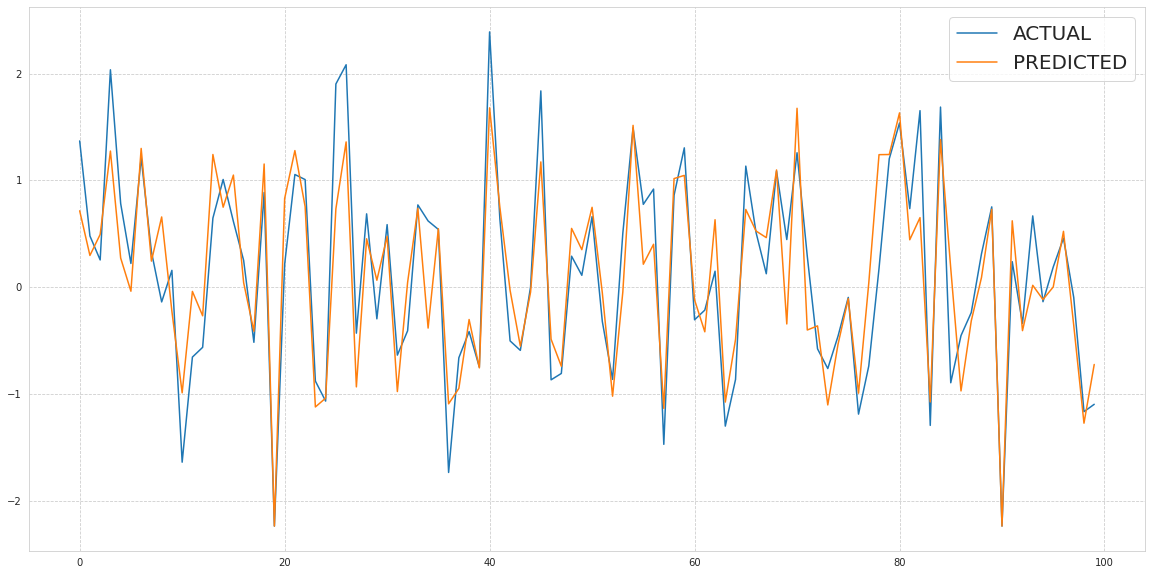

In [152]:
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [153]:
print("Training R2")
print(random.score(X_train,y_train))
print("Testing R2")
print(random.score(X_test,y_test))

Training R2
0.9815068184001775
Testing R2
0.982191569674671


### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Based on the evaluation metrics for the Random Forest Regressor model, it appears that the model is performing very well on both the training and testing data, with R2 scores close to 1. 
- We could conclude that best model for us will be Random Forest Regressor and followed by Support Vector Machine for improvment of our prediction

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Based on the evaluation metrics for the Random Forest Regressor model, it appears that the model is performing very well on both the training and testing data, with R2 scores close to 1. There is good accuracy between training and testing data.

We could conclude that best model for us will be Random Forest Regressor and followed by Support Vector Machine for improvment of our prediction

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

- Random Forest Regressor as my final ML model due to below reasons,

- Training R2
  0.9815068184001775
  Testing R2
  0.982191569674671

- MSE : 0.164091044932586
  RMSE : 0.4050815287477152
  R2 : 0.8337826685726084
  Adjusted R2 :  0.8311794969087223

- Based on the evaluation metrics for the Random Forest Regressor model, it appears that the model is performing very well on both the training and testing data, with R2 scores close to 1. There is good accuracy between training and testing data.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

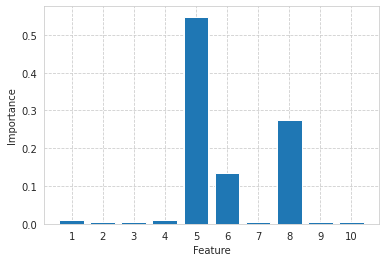

In [154]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Generate some random data for demonstration
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=0)

# Train a random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X, y)

# Plot the feature importances
plt.bar(range(X.shape[1]), rf.feature_importances_)
plt.xticks(range(X.shape[1]), range(1, X.shape[1]+1))
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


- Random forest regressor is a machine learning algorithm that combines multiple decision trees to make predictions. It is a popular algorithm for both classification and regression tasks due to its robustness and ability to handle large datasets with high dimensionality.

- The algorithm works by randomly selecting a subset of features at each split to build a collection of decision trees, called an ensemble. Each tree is trained on a different subset of the data and the final prediction is made by taking the average or majority vote of the predictions from all the trees. This method reduces the variance and overfitting problems that can occur with a single decision tree.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [79]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [80]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

- In Afternoon and Night there were more vehicle rented so for our business perspective we could focus more on morning time for increase supply.

- During all morning, afternoon and Night bike rent count is more in Summer Season only so we could predict that customer might be not use bike due to rain and during winter excess cool whether why i am predicting this because as we seen " As the temperature increases bike rent count increases in plot".

- Bike Rent count is more when no holiday is there so we can say that people uses bike for transportation to go for offices and other works.

- As we seen here that in 2017 bike rent count is less and in 2018 count is increase drastically why because due to starting of services people might not know about this much so they used less but when people start using this service count is gone more in 2018 so we could expect that in upcomming year count would further increase as people will use service more and more.

- Here we clearly seen trend that first month count is increasing in everymonth till summer and after that count is further start decilining it may be because of rainy season people prefer less bike rent services.

- Final comment are that " There is a scope of improvement further as we need more data in future and we could capture information of customers who have used this services and we could also capture their occupation so we could predict more accurately".

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***